<a href="https://colab.research.google.com/github/cibelerusso/MRASII/blob/main/C%C3%B3digos%20em%20Python/SME0823_MLG_Estima%C3%A7%C3%A3o_dos_par%C3%A2metros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estimação de Parâmetros em MLGs

Por **Cibele Russo**

**ICMC USP**

SME0823 Modelos de Regressão e Aprendizado Supervisionado II

**Conteúdo**

1. Concavidade da log-verossimilhança

2. Matriz de informação de Fisher observada e esperada

3. Método de Newton-Raphson (IRLS)



Neste notebook discutimos sobre a concavidade da log-verossimilhança e apresentamos expressões gerais da informação de Fisher **observada** e **esperada** para Modelos Lineares Generalizados (MLG), ilustrando com dois exemplos canônicos: **Bernoulli/Logístico** e **Poisson/Log**.

Incluímos também a estimação de parâmetros via IRLS (Iterative Reweighted Least Squares, ou Newton-Raphson) e verificação numérica (via diferenças finitas) de que

$$-\nabla^2 \ell(\beta) = X^\top W X$$

nos modelos com função de ligação canônica.


## Informação de Fisher em Modelos Lineares Generalizados (MLG)

Considere $Y_i$ independentes com densidade da família exponencial

$$
f(y_i;\theta_i,\phi)
=\exp\left\{\phi\{y_i\theta_i-b(\theta_i)\}+c(y_i,\phi)\right\},
\quad i=1,\dots,n,
$$


com

- $E(Y_i)=\mu_i=b'(\theta_i)$

- $\operatorname{Var}(Y_i)=\phi\,b''(\theta_i)=\phi\,V(\mu_i)$,

em que $V(\mu_i)$ é a função de variância.


No MLG, a média da resposta $\mu_i$ se relaciona ao preditor linear $\eta_i=x_i^\top\beta$ via uma função de ligação $g(\mu_i)=\eta_i$.


Defina $D=\mathrm{diag}(d\mu_i/d\eta_i)$ e $V=\mathrm{diag}(V(\mu_i))$.


### Verossimilhança e  Log-verossimilhança

Assumindo $Y_1,\dots,Y_n$ independentes, a função de verossimilhança é dada por
$$
L(\beta;\,y)
= \prod_{i=1}^n f(y_i;\theta_i,\phi)
= \prod_{i=1}^n
\exp\!\Big\{ \phi\,[y_i\theta_i - b(\theta_i)] + c(y_i,\phi) \Big\},
$$
onde $\theta_i$ depende de $\beta$ via $\eta_i=x_i^\top\beta$ e $g(\mu_i)=\eta_i$.



A função de log-verossimilhança conjunta para uma amostra de tamanho n é
$$
\ell(\beta;\,y)
= \sum_{i=1}^n \Big\{ \phi\,[y_i\theta_i - b(\theta_i)] + c(y_i,\phi) \Big\},
$$
com $\theta_i$ dependente de $\eta_i=x_i^\top\beta$ via a função de ligação $g(\mu_i)=\eta_i$.




### Escore (gradiente)

$$
U(\beta)=\frac{\partial \ell}{\partial \beta}
=\sum_{i=1}^n \frac{y_i-\mu_i}{\phi\,V(\mu_i)}\frac{d\mu_i}{d\eta_i}\,x_i
= X^\top\,W_{\text{gen}}\,(y-\mu),
$$
onde
$$
W_{\text{gen}}=\mathrm{diag}\!\left(\frac{1}{\phi}\frac{(d\mu_i/d\eta_i)}{V(\mu_i)}\right).
$$

Os pesos usuais de IRLS utilizando a matriz de informação esperada são dados por
$$
{\,W^\ast=\mathrm{diag}\!\left(\frac{1}{\phi}\frac{(d\mu_i/d\eta_i)^2}{V(\mu_i)}\right)\,}.
$$


### Hessiana e Informação de Fisher

Derivando a função escore, a Hessiana (matriz de derivadas segundas) é dada por
$$
-\nabla^2\ell(\beta)
= X^\top W^\ast X \;-\; \sum_{i=1}^n \frac{y_i-\mu_i}{\phi}\frac{d^2\mu_i}{d\eta_i^2}\, x_ix_i^\top.
$$

Tomando o valor esperado em $Y$, o termo adicional desaparece e obtemos a matriz de informação de Fisher esperada:
$$
{\; \mathcal I(\beta)= E[-\nabla^2\ell(\beta)]=X^\top W^\ast X \; }.
$$


### Caso canônico

Se a ligação é canônica ($\eta_i=\theta_i$), então $d\mu_i/d\eta_i=V(\mu_i)$ e
$$
{\,W=\mathrm{diag}\!\left(\frac{V(\mu_i)}{\phi}\right)\,},
$$
além disso,
$$
{\; -\nabla^2\ell(\beta)=X^\top W X \quad\text{(ligação canônica)}\;}
$$
logo, informação observada $=$ esperada.

Como $W\succeq 0$ (semidefinida positiva), temos que $\ell(\beta)$ é côncava em $\beta$ (estritamente côncava se $X$ tem posto completo).


### Exemplos com função de ligação canônica

#### Binomial (Bernoulli) com Ligação logito


Para $Y_i\sim\text{Bernoulli}(\mu_i)$,

- $\phi=1$,
- $V(\mu)=\mu(1-\mu)$,
- $g(\mu)=\displaystyle\log\frac{\mu}{1-\mu}$.

Nesse caso, temos

$
\ell(\beta)=\sum_{i=1}^n \big[y_i\eta_i-\log(1+e^{\eta_i})\big],
$

$
\nabla \ell(\beta)=X^\top(y-\mu),$

$
-\nabla^2\ell(\beta)=X^\top \mathrm{diag}\big(\mu_i(1-\mu_i)\big) X.
$

#### Poisson com ligação log


Para $Y_i\sim\text{Poisson}(\mu_i)$,

- $\phi=1$,
- $V(\mu)=\mu$,
- $g(\mu)=\log\mu$.

Nesse caso, temos

$
\ell(\beta)=\sum_{i=1}^n \big[y_i\eta_i - e^{\eta_i}\big],
$

$
\nabla \ell(\beta)=X^\top(y-\mu),$

$
-\nabla^2\ell(\beta)=X^\top \mathrm{diag}(\mu_i)\, X.
$

Em geral, a ligação canônica implica informação observada = esperada.
- Modelo de regressão logística: $W_i=\mu_i(1-\mu_i)$.
- Poisson: $W_i=\mu_i$.


- Ligação não-canônica: observada e esperada diferem; usa-se $W^\ast$ para a esperada.


### Iteratively Reweighted Least Squares (IRLS)

O passo de Newton/IRLS é
$$
\beta^{\text{novo}}
= \beta^{\text{ant}} + (X^\top W X)^{-1} X^\top W z,
$$
com
$$
W=\begin{cases}
\mathrm{diag}\big(V(\mu_i)/\phi\big), & \text{ligação canônica},\\[6pt]
\mathrm{diag}\big((d\mu_i/d\eta_i)^2/\{\phi V(\mu_i)\}\big), & \text{geral (ligação não-canônica)},
\end{cases}$$

e $z=\eta + (y-\mu)\,\frac{d\eta}{d\mu}.$


# Logaritmo de verossimilhança côncava é côncava


Seja $L(\theta)$ uma função de verossimilhança **côncava** e **positiva** no domínio $\mathcal{D}\subset\mathbb{R}^k$.

A **log-verossimilhança** $\ell(\theta)=\log L(\theta)$ também é **côncava** em $\mathcal{D}$?



## Prova curta (composição de funções)

- $\log:(0,\infty)\to\mathbb{R}$ é **crescente** e **côncava**.

- Se $f$ é côncava e $g$ é côncava **não decrescente**, então $g\!\circ\! f$ é côncava (quando bem-definida).

- Como $L$ é côncava e positiva e $\log$ é côncava e não decrescente, segue que $\ell(\theta)=\log(L(\theta))$ é **côncava**.



## Detalhe via desigualdade (Jensen)

Para quaisquer $\theta_1,\theta_2$ e $t\in[0,1]$:


$$
L(t\theta_1+(1-t)\theta_2)\ \ge\ tL(\theta_1)+(1-t)L(\theta_2).
$$


Aplicando $\log$ (crescente e côncava):


$$
\log L(t\theta_1+(1-t)\theta_2)
\ \ge\ \log\!\big(tL(\theta_1)+(1-t)L(\theta_2)\big)
\ \ge\ t\log L(\theta_1)+(1-t)\log L(\theta_2),
$$


logo $\log L$ é côncava.


**Observação:** é essencial que $L(\theta)>0$ no domínio considerado; caso contrário $\log L(\theta)$ não está definida.


## Exemplo 1D: $L(\theta)=2-\theta^2$
No intervalo $|\theta|<\sqrt{2}$ temos $L(\theta)>0$. Essa $L$ é côncava; veremos que $\log L$ também é.


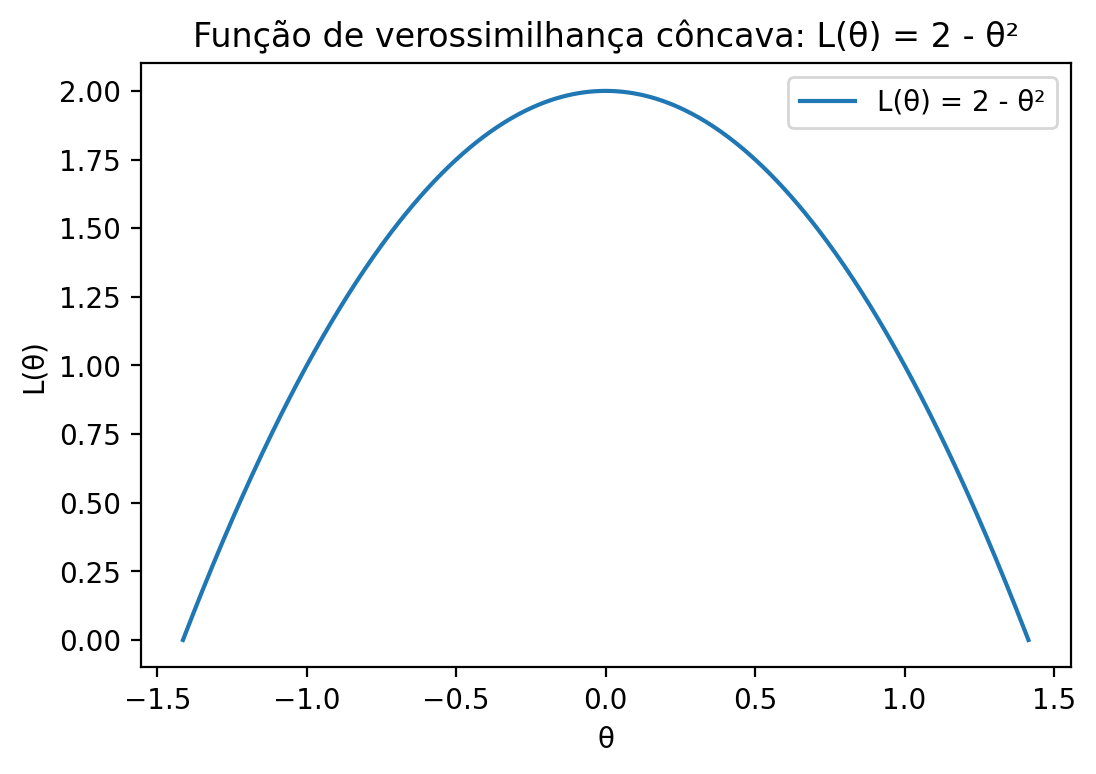

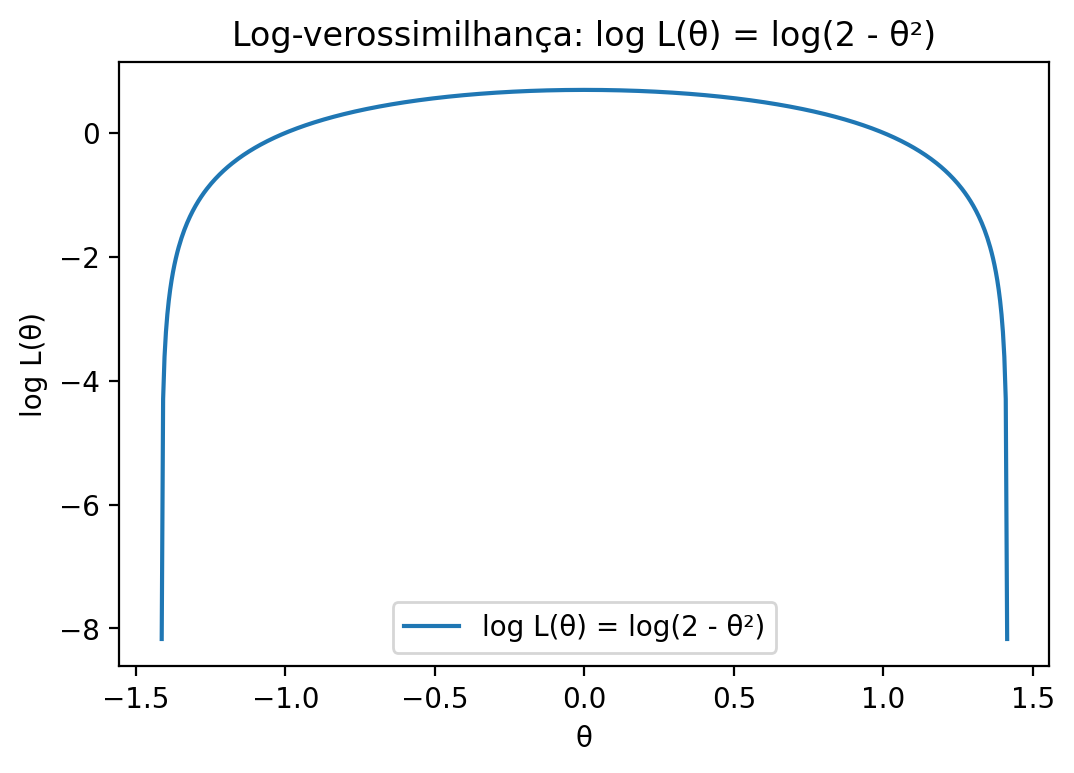

In [ ]:
# Pacotes
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

# Domínio estritamente dentro de (-sqrt(2), sqrt(2)) para evitar L=0 nas bordas
eps = 1e-4
theta = np.linspace(-np.sqrt(2)+eps, np.sqrt(2)-eps, 600)
L = 2 - theta**2
logL = np.log(L)

# Gráfico de L(θ)
plt.figure()
plt.plot(theta, L, label="L(θ) = 2 - θ²")
plt.title("Função de verossimilhança côncava: L(θ) = 2 - θ²")
plt.xlabel("θ")
plt.ylabel("L(θ)")
plt.legend()
plt.show()

# Gráfico de log L(θ)
plt.figure()
plt.plot(theta, logL, label="log L(θ) = log(2 - θ²)")
plt.title("Log-verossimilhança: log L(θ) = log(2 - θ²)")
plt.xlabel("θ")
plt.ylabel("log L(θ)")
plt.legend()
plt.show()


### Checagem pela segunda derivada (1D)
Para $\ell(\theta)=\log(2-\theta^2)$, derivando:
$
\ell''(\theta) = -\frac{2(2+\theta^2)}{(2-\theta^2)^2} \le 0 \quad \text{para } |\theta|<\sqrt{2},
$
confirmando a concavidade.


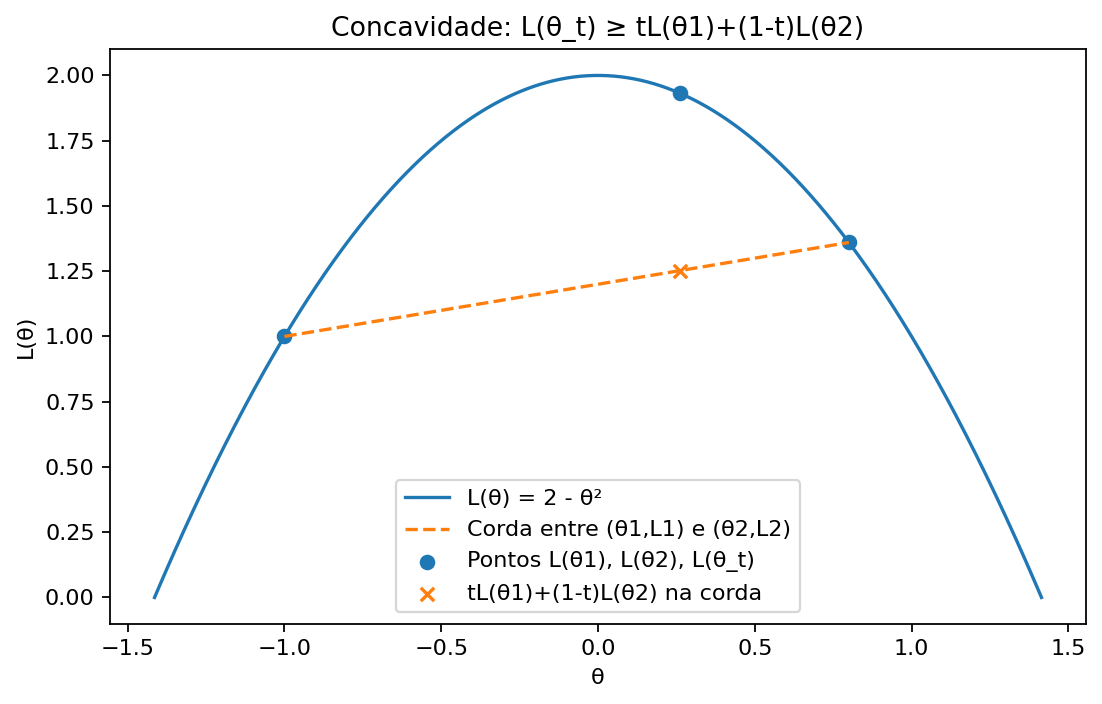

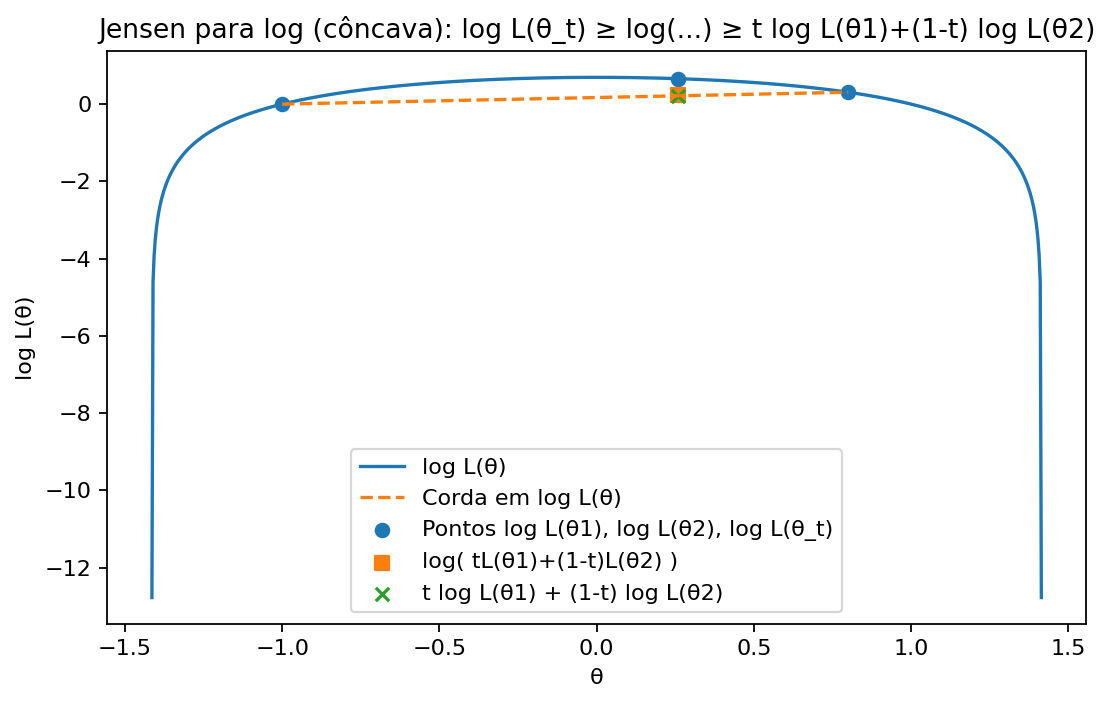

Parâmetros: t=0.30, θ1=-1.00, θ2=0.80
L(θ_t)                = 1.932400
tL(θ1)+(1-t)L(θ2)     = 1.252000
log L(θ_t)            = 0.658763
log(tL1+(1-t)L2)      = 0.224742
t log L1+(1-t) log L2 = 0.215239


In [ ]:
#!/usr/bin/env python3
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path

mpl.rcParams['figure.dpi'] = 160
mpl.rcParams['savefig.dpi'] = 300

def make_plots(theta1=-1.0, theta2=0.8, t=0.3, outdir=Path(".")):
    outdir.mkdir(parents=True, exist_ok=True)
    eps = 1e-6
    theta = np.linspace(-np.sqrt(2)+eps, np.sqrt(2)-eps, 800)
    L = 2 - theta**2
    logL = np.log(L)

    theta_t = t*theta1 + (1-t)*theta2
    L1, L2 = 2 - theta1**2, 2 - theta2**2
    Lt = 2 - theta_t**2
    chord_at_t = t*L1 + (1-t)*L2

    # Fig 1: Concavity
    plt.figure(figsize=(7,4.5))
    plt.plot(theta, L, label="L(θ) = 2 - θ²")
    plt.plot([theta1, theta2], [L1, L2], linestyle="--", label="Corda entre (θ1,L1) e (θ2,L2)")
    plt.scatter([theta1, theta2, theta_t], [L1, L2, Lt], marker="o", label="Pontos L(θ1), L(θ2), L(θ_t)")
    plt.scatter([theta_t], [chord_at_t], marker="x", label="tL(θ1)+(1-t)L(θ2) na corda")
    plt.title("Concavidade: L(θ_t) ≥ tL(θ1)+(1-t)L(θ2)")
    plt.xlabel("θ")
    plt.ylabel("L(θ)")
    plt.legend()
    plt.tight_layout()
    plt.savefig(outdir / "concavidade_L.png", bbox_inches="tight")
    plt.show()

    # Fig 2: Jensen chain on log L
    log_chord_at_t = t*np.log(L1) + (1-t)*np.log(L2)
    mid_term = np.log(chord_at_t)

    plt.figure(figsize=(7,4.5))
    plt.plot(theta, logL, label="log L(θ)")
    plt.plot([theta1, theta2], [np.log(L1), np.log(L2)], linestyle="--", label="Corda em log L(θ)")
    plt.scatter([theta1, theta2, theta_t], [np.log(L1), np.log(L2), np.log(Lt)], marker="o",
                label="Pontos log L(θ1), log L(θ2), log L(θ_t)")
    plt.scatter([theta_t], [mid_term], marker="s", label="log( tL(θ1)+(1-t)L(θ2) )")
    plt.scatter([theta_t], [log_chord_at_t], marker="x", label="t log L(θ1) + (1-t) log L(θ2)")
    plt.title("Jensen para log (côncava): log L(θ_t) ≥ log(...) ≥ t log L(θ1)+(1-t) log L(θ2)")
    plt.xlabel("θ")
    plt.ylabel("log L(θ)")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.savefig(outdir / "jensen_logL.png", bbox_inches="tight")
    plt.show()

    print(f"Parâmetros: t={t:.2f}, θ1={theta1:.2f}, θ2={theta2:.2f}")
    print(f"L(θ_t)                = {Lt:.6f}")
    print(f"tL(θ1)+(1-t)L(θ2)     = {chord_at_t:.6f}")
    print(f"log L(θ_t)            = {np.log(Lt):.6f}")
    print(f"log(tL1+(1-t)L2)      = {mid_term:.6f}")
    print(f"t log L1+(1-t) log L2 = {log_chord_at_t:.6f}")
    return True

if __name__ == "__main__":
    make_plots()


## Exemplo 2D: $L(x,y)=3-x^2-2y^2$ (contornos)
No interior da elipse $x^2+2y^2<3$, $L(x,y)>0$. Plotamos contornos de $L$ e de $\log L$.


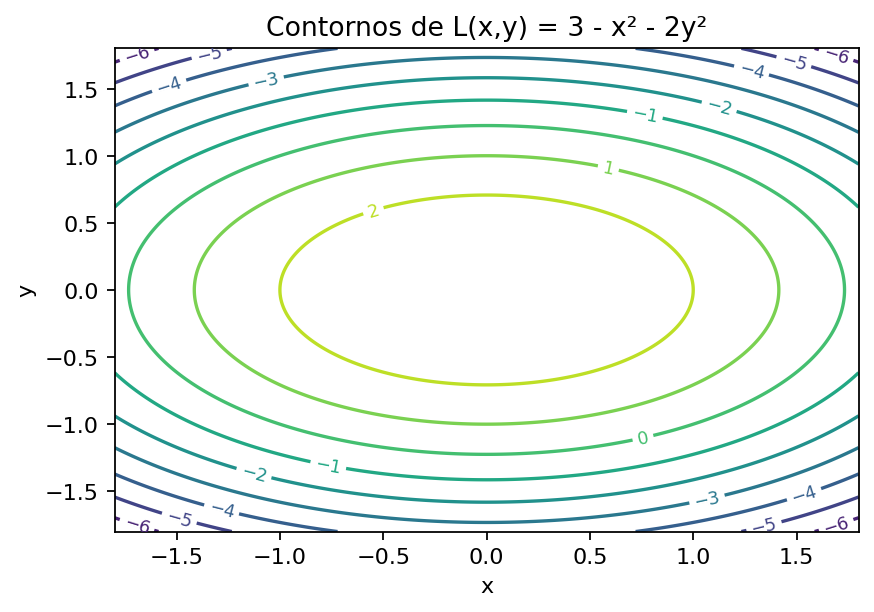

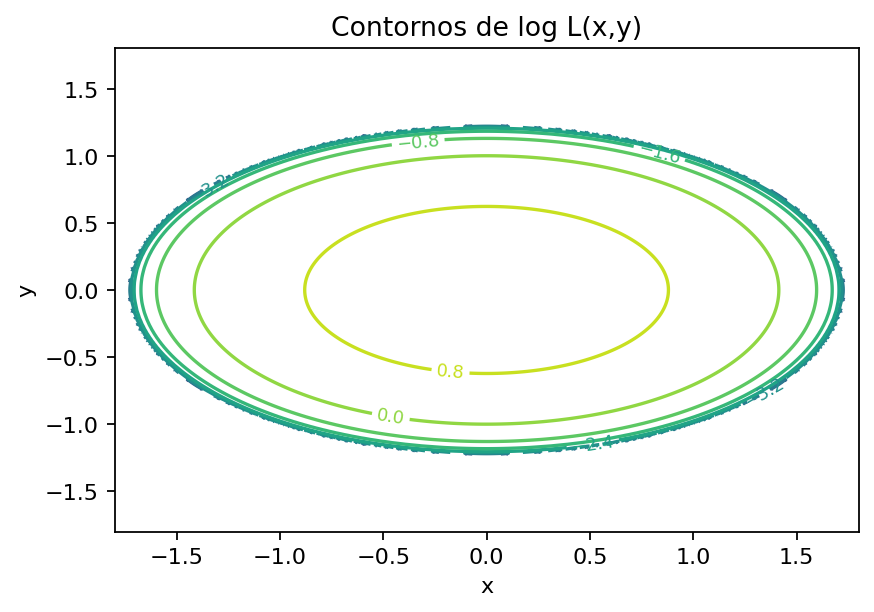

In [ ]:

# Grade 2D
x = np.linspace(-1.8, 1.8, 300)
y = np.linspace(-1.8, 1.8, 300)
X, Y = np.meshgrid(x, y)
L2 = 3 - X**2 - 2*Y**2

# Máscara de positividade e log
mask = L2 > 0
logL2 = np.full_like(L2, np.nan, dtype=float)
logL2[mask] = np.log(L2[mask])

# Contornos de L
plt.figure()
cs1 = plt.contour(X, Y, L2, levels=10)
plt.clabel(cs1, inline=True, fontsize=8)
plt.title("Contornos de L(x,y) = 3 - x² - 2y²")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Contornos de log L
plt.figure()
cs2 = plt.contour(X, Y, logL2, levels=10)
plt.clabel(cs2, inline=True, fontsize=8)
plt.title("Contornos de log L(x,y)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()



## Funções auxiliares
- IRLS (Iteratively Reweighted Least Squares ou Newton) para ajustar MLGs com **links canônicos** para Bernoulli (logístico) e Poisson (log).  

- Incluímos uma **Hessiana numérica** por diferenças finitas para checagem.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------- utilidades numéricas --------
def approx_hessian(f, beta, eps=1e-5):
    beta = np.asarray(beta, dtype=float)
    p = beta.size
    H = np.zeros((p, p), dtype=float)
    # Segunda derivada por diferenças finitas centrais (simétrica)
    for i in range(p):
        for j in range(i, p):
            ei = np.zeros_like(beta); ei[i] = eps
            ej = np.zeros_like(beta); ej[j] = eps
            f_pp = f(beta + ei + ej)
            f_pm = f(beta + ei - ej)
            f_mp = f(beta - ei + ej)
            f_mm = f(beta - ei - ej)
            H_ij = (f_pp - f_pm - f_mp + f_mm) / (4*eps*eps)
            H[i, j] = H[j, i] = H_ij
    return H

def newton_glm_canonical(X, y, family, max_iter=100, tol=1e-8):
    """
    Ajusta GLM canônico por Newton/IRLS.
    family: 'binomial' (logit) ou 'poisson' (log)
    Retorna beta, mu, W e histórico.
    """
    n, p = X.shape
    beta = np.zeros(p)
    history = []

    for it in range(max_iter):
        eta = X @ beta
        if family == 'binomial':
            # logístico canônico
            mu = 1.0 / (1.0 + np.exp(-eta))
            V = mu * (1.0 - mu)      # Var(yi) = mu(1-mu) (phi=1)
            W = V                     # canônico => w_i = V(μ_i)/phi (phi=1)
            z = eta + (y - mu) / (V + 1e-12)
        elif family == 'poisson':
            mu = np.exp(eta)
            V = mu                    # Var(yi) = mu (phi=1)
            W = V
            z = eta + (y - mu) / (V + 1e-12)
        else:
            raise ValueError("family deve ser 'binomial' ou 'poisson'")

        # Passo de Newton: (X^T W X) delta = X^T (y - mu)
        WX = X * W[:, None]
        H = X.T @ WX                # Hessiana negativa teórica
        g = X.T @ (y - mu)          # gradiente
        try:
            delta = np.linalg.solve(H, g)
        except np.linalg.LinAlgError:
            delta = np.linalg.pinv(H) @ g

        beta_new = beta + delta
        history.append((it, beta.copy(), np.linalg.norm(delta)))

        if np.linalg.norm(delta) < tol:
            beta = beta_new
            break
        beta = beta_new

    return beta, mu, W, history

def fisher_info_XtWX(X, W):
    return X.T @ (X * W[:, None])



## Exemplo Bernoulli / Regressão Logística (ligação logito)
### Simulação e ajuste
Geramos dados com intercepto e duas covariáveis, ajustamos por IRLS e comparamos:
- $\mathcal{I}(\hat\beta) = X^\top W(\hat\beta) X$
- $-\nabla^2 \ell(\hat\beta)$ aproximada por diferenças finitas.


In [ ]:
# ----- Simulação: Bernoulli/Logístico -----
rng = np.random.default_rng(123)
n = 500
X = np.c_[np.ones(n), rng.normal(size=(n, 2))]
beta_true = np.array([-0.5, 1.0, -1.2])
eta = X @ beta_true
p = 1.0 / (1.0 + np.exp(-eta))
y = rng.binomial(1, p)

# Ajuste por IRLS
beta_hat_logit, mu_hat, W_hat, hist = newton_glm_canonical(X, y, family='binomial')

# Informação de Fisher pela forma X^T W X
I_xtwx = fisher_info_XtWX(X, W_hat)

# Log-verossimilhança para diferenças finitas
def loglik_logit(b):
    e = X @ b
    # log(1 + exp(e)) estável numericamente
    return np.sum(y*e - np.log1p(np.exp(e)))

H_fd = approx_hessian(loglik_logit, beta_hat_logit)
I_fd = -H_fd

# Comparação (norma de Frobenius do erro) Referência: https://mathworld.wolfram.com/FrobeniusNorm.html
err = np.linalg.norm(I_xtwx - I_fd, ord='fro')
print("β_hat (logístico):", beta_hat_logit)
print("|| X^T W X  -  ( -∇²ℓ ) ||_F =", err)


β_hat (logístico): [-0.41933081  1.04896541 -1.19701992]
|| X^T W X  -  ( -∇²ℓ ) ||_F = 0.00024381925576524307


In [ ]:
import numpy as np
import statsmodels.api as sm

# Ajuste GLM binomial (logit)
res_bin = sm.GLM(y, X, family=sm.families.Binomial()).fit()
print(res_bin.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  500
Model:                            GLM   Df Residuals:                      497
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -257.50
Date:                Wed, 17 Sep 2025   Deviance:                       515.00
Time:                        15:55:29   Pearson chi2:                     484.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2932
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4193      0.111     -3.773      0.0


### Visualizações
- Probabilidades ajustadas $\hat p_i$ vs. preditor linear $\hat\eta_i$.
- Pesos $w_i = \hat p_i(1-\hat p_i)$ usados em $W$.


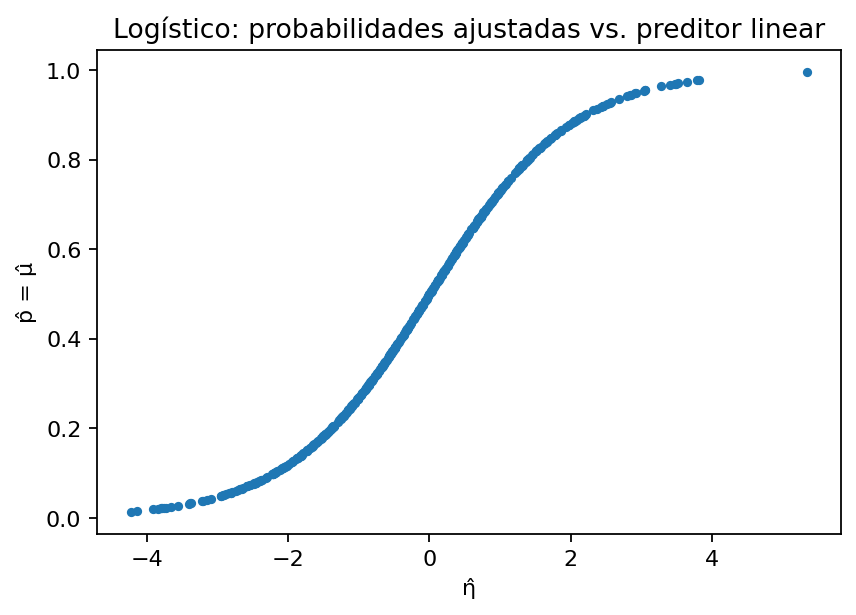

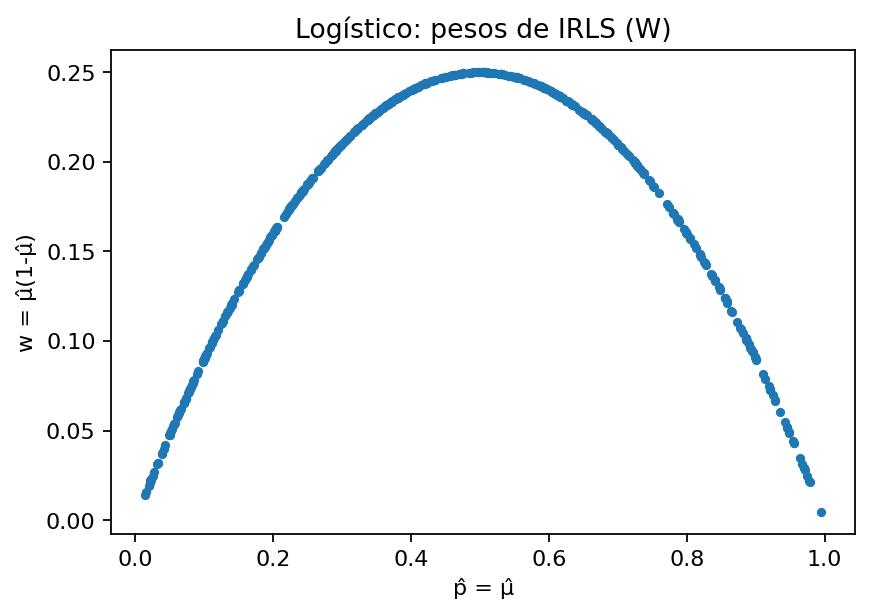

In [ ]:

eta_hat = X @ beta_hat_logit

# Gráfico: p_hat vs eta_hat
plt.figure()
plt.scatter(eta_hat, mu_hat, s=10)
plt.xlabel("η̂")
plt.ylabel("p̂ = μ̂")
plt.title("Logístico: probabilidades ajustadas vs. preditor linear")
plt.show()

# Gráfico: pesos W vs p_hat
plt.figure()
plt.scatter(mu_hat, W_hat, s=10)
plt.xlabel("p̂ = μ̂")
plt.ylabel("w = μ̂(1-μ̂)")
plt.title("Logístico: pesos de IRLS (W)")
plt.show()



## Exemplo Poisson / Regressão Poisson (link log)
### Simulação e ajuste
Procedimento análogo para dados de contagem com taxa $\lambda_i = \exp(\eta_i)$.


In [ ]:

# ----- Simulação: Poisson/Log -----
rng = np.random.default_rng(456)
n2 = 600
X2 = np.c_[np.ones(n2), rng.normal(size=(n2, 2))]
beta_true2 = np.array([0.2, 0.5, -0.3])
eta2 = X2 @ beta_true2
lam = np.exp(eta2)
y2 = rng.poisson(lam)

# Ajuste por IRLS
beta_hat_pois, mu_hat2, W_hat2, hist2 = newton_glm_canonical(X2, y2, family='poisson')

# Informação de Fisher via X^T W X (W = μ̂)
I_xtwx2 = fisher_info_XtWX(X2, W_hat2)

# Log-verossimilhança para diferenças finitas (constante ignorada)
def loglik_pois(b):
    e = X2 @ b
    m = np.exp(e)
    return np.sum(y2*e - m)

H_fd2 = approx_hessian(loglik_pois, beta_hat_pois)
I_fd2 = -H_fd2
err2 = np.linalg.norm(I_xtwx2 - I_fd2, ord='fro')
print("β_hat (Poisson):", beta_hat_pois)
print("|| X^T W X  -  ( -∇²ℓ ) ||_F =", err2)


β_hat (Poisson): [ 0.22658936  0.52847143 -0.22758676]
|| X^T W X  -  ( -∇²ℓ ) ||_F = 0.0005818623626457572


In [ ]:
y

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,

In [ ]:
# Ajuste GLM poisson (log)
res_pois = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print(res_pois.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  500
Model:                            GLM   Df Residuals:                      497
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -366.42
Date:                Wed, 17 Sep 2025   Deviance:                       280.83
Time:                        15:55:50   Pearson chi2:                     248.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1446
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0201      0.080    -12.737      0.0


### Visualizações
- Médias ajustadas $\hat\lambda_i$ vs. preditor $\hat\eta_i$.
- Pesos $w_i=\hat\lambda_i$ usados em $W$.


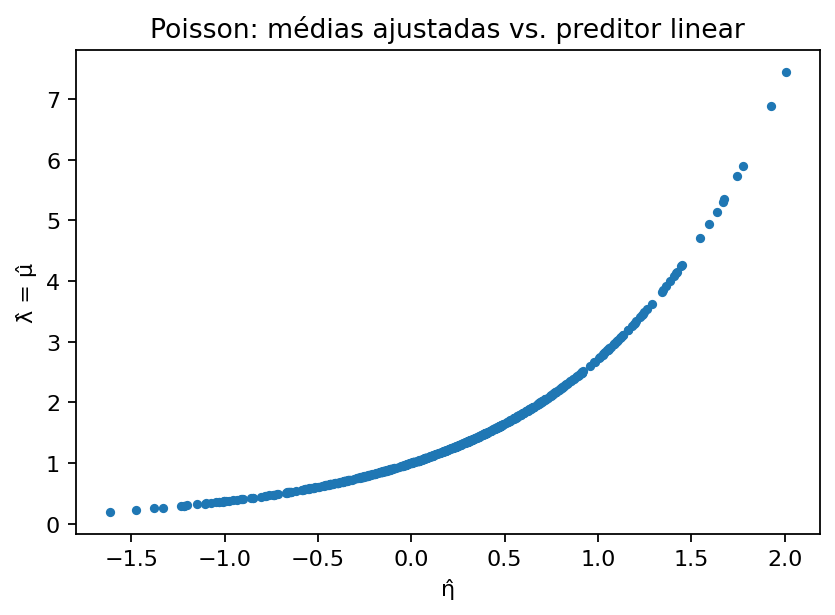

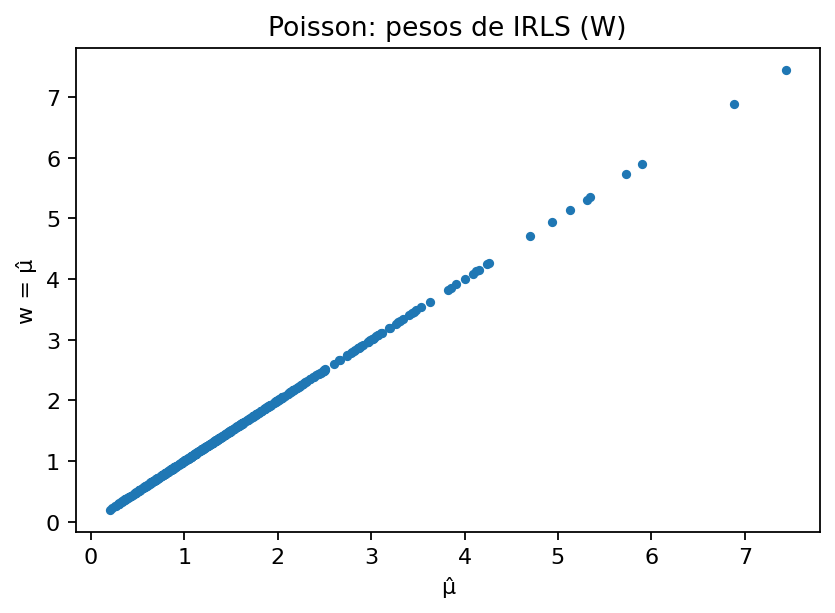

In [ ]:
eta_hat2 = X2 @ beta_hat_pois

# Gráfico: mu_hat2 vs eta_hat2
plt.figure()
plt.scatter(eta_hat2, mu_hat2, s=10)
plt.xlabel("η̂")
plt.ylabel("λ̂ = μ̂")
plt.title("Poisson: médias ajustadas vs. preditor linear")
plt.show()

# Gráfico: pesos W vs mu_hat2 (aqui W=μ̂)
plt.figure()
plt.scatter(mu_hat2, W_hat2, s=10)
plt.xlabel("μ̂")
plt.ylabel("w = μ̂")
plt.title("Poisson: pesos de IRLS (W)")
plt.show()


## Conclusões
- Para MLGs, a informação de Fisher **observada** e **esperada** tem forma $X^\top W X$.
- Com **função de ligação canônica**, $w_i = V(\mu_i)/\phi$ e a observada **coincide ponto a ponto** com a esperada.
- Os exemplos logístico e Poisson confirmam numericamente que $-\nabla^2\ell(\hat\beta)=X^\top W X$.
